In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
plt.style.use('seaborn-v0_8')

In [3]:
FONT_SIZE= 12
plt.rcParams.update({
    # 'figure.dpi': 150,
    # 'savefig.dpi': 300,
    # 'savefig.transparent': True,
    # # Font
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': FONT,
    'font.size': FONT_SIZE,
    'axes.labelsize': FONT_SIZE,
    'axes.titlesize': 14,
    'xtick.labelsize': FONT_SIZE,
    'ytick.labelsize': FONT_SIZE,
    'legend.fontsize': FONT_SIZE,
    # line width
    # 'axes.linewidth': LINEWIDTH,
    # 'grid.linewidth': LINEWIDTH,
    # 'lines.linewidth': LINEWIDTH,
    # 'patch.linewidth': LINEWIDTH,
    # 'xtick.major.width': LINEWIDTH,
    # 'xtick.minor.width': LINEWIDTH,
    # 'ytick.major.width': LINEWIDTH,
    # 'ytick.minor.width': LINEWIDTH,
})

In [4]:
def plot_explained_variance(pca):   
 # Determine explained variance using explained_variance_ration_ attribute
    #
    exp_var_pca = pca.explained_variance_ratio_
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    #plt.tight_layout()
    plt.show()

# Chargement des données et sélection des dimensions

In [5]:
model_path = "pca_buc.pickle"
with open(model_path, 'rb') as f:
        pca_buc = pickle.load(f)

model_path = "pca_gpj.pickle"
with open(model_path, 'rb') as f:
        pca_gpj = pickle.load(f)

model_path = "pca_wsj.pickle"
with open(model_path, 'rb') as f:
        pca_wsj = pickle.load(f)

model_path = "pca_csj.pickle"
with open(model_path, 'rb') as f:
        pca_csj = pickle.load(f)

In [6]:
model_path = "transformed_data_buc.pickle"
with open(model_path, 'rb') as f:
        raw_data_buc = pickle.load(f)

model_path = "transformed_data_wsj.pickle"
with open(model_path, 'rb') as f:
        raw_data_wsj = pickle.load(f)

model_path = "transformed_data_csj.pickle"
with open(model_path, 'rb') as f:
        raw_data_csj = pickle.load(f)

model_path = "transformed_data_gpj.pickle"
with open(model_path, 'rb') as f:
        raw_data_gpj = pickle.load(f)

In [7]:
def select_dimensions(pca): #renvoie l'indice de la dernière composante nécessaire pour expliquer 90% de la variance d'une PCA
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    last_component = min([i for i,v in enumerate(cum_sum_eigenvalues) if v >= 0.9])

    return last_component

In [8]:
data_buc= raw_data_buc[:, 1:select_dimensions(pca_buc)] #on enlève les composantes après celles qui expliquent 90% de la variance et la toute première qui représente le silence
data_csj= raw_data_csj[:, 1:select_dimensions(pca_csj)]
data_wsj= raw_data_wsj[:, 1:select_dimensions(pca_wsj)]
data_gpj= raw_data_gpj[:, 1:select_dimensions(pca_gpj)]


data_jp = np.concatenate([data_gpj, data_csj], axis=1)
data_en = np.concatenate([data_buc, data_wsj], axis=1)

del data_buc, data_csj, data_gpj, data_wsj

# Ouverture des fichiers de sortie de la CCA

In [9]:
model_path = "cca.pickle"
with open(model_path, 'rb') as f:
        cca = pickle.load(f)

model_path = "cca_jp_scores.pickle"
with open(model_path, 'rb') as f:
        jp_scores = pickle.load(f)

model_path = "cca_en_scores.pickle"
with open(model_path, 'rb') as f:
        en_scores = pickle.load(f)


# Analyse des résultats de la CCA

In [10]:
np.corrcoef(en_scores[:, 0], jp_scores[:, 0])

array([[1.        , 0.99190678],
       [0.99190678, 1.        ]])

In [11]:
cc_res = pd.DataFrame({"CC japonais 1":jp_scores[:, 0],
                       "CC anglais 1":en_scores[:, 0],
                       "CC japonais 2":jp_scores[:, 1],
                       "CC anglais 2":en_scores[:, 1],
                       "CC japonais 3":jp_scores[:, 2],
                       "CC anglais 3":en_scores[:, 2],
                       "CC japonais 4":jp_scores[:, 3],
                       "CC anglais 4":en_scores[:, 3]
                       }
                       )

In [12]:
cc_res

,CC japonais 1,CC anglais 1,CC japonais 2,CC anglais 2,CC japonais 3,CC anglais 3,CC japonais 4,CC anglais 4
0,-0.093731,-0.043722,-0.005355,0.008770,0.216475,0.191827,0.171134,0.181406
1,-0.238780,-0.390945,0.122416,0.221777,0.268717,0.540292,0.263470,0.496919
2,-0.521919,-0.617183,0.347651,0.328980,0.657235,0.762841,0.647029,0.624592
3,-0.519189,-0.550145,0.364428,0.351227,0.424025,0.599069,0.503021,0.552888
4,-0.421972,-0.486389,0.319311,0.419771,0.432498,0.532905,0.476345,0.555223
...,...,...,...,...,...,...,...,...
362893,-0.111284,-0.164276,0.203109,0.175582,0.172885,0.200247,0.329288,0.238735
362894,-0.323378,-0.426352,0.196848,0.228294,0.290375,0.596763,0.439141,0.754489
362895,-0.226555,-0.380326,0.263110,0.217612,0.256712,0.420275,0.333326,0.520096
362896,-0.289827,-0.612512,0.218048,0.354289,0.212569,0.409069,0.277294,0.549565


In [13]:
corr_X_df= cc_res.corr(method='pearson') 
corr_X_df

,CC japonais 1,CC anglais 1,CC japonais 2,CC anglais 2,CC japonais 3,CC anglais 3,CC japonais 4,CC anglais 4
CC japonais 1,1.000000e+00,9.919068e-01,5.253628e-16,6.446190e-04,1.075546e-15,1.851133e-04,-6.980997e-16,2.696451e-04
CC anglais 1,9.919068e-01,1.000000e+00,2.253630e-15,1.844309e-15,-1.271869e-16,-2.064801e-16,6.931840e-16,1.101242e-15
CC japonais 2,5.253628e-16,2.253630e-15,1.000000e+00,9.831076e-01,1.874993e-15,-5.827781e-04,2.565755e-15,-5.949400e-04
CC anglais 2,6.446190e-04,1.844309e-15,9.831076e-01,1.000000e+00,2.101012e-15,-7.301565e-16,-1.412441e-15,1.604253e-16
CC japonais 3,1.075546e-15,-1.271869e-16,1.874993e-15,2.101012e-15,1.000000e+00,9.794095e-01,1.600721e-15,-9.724617e-04
CC anglais 3,1.851133e-04,-2.064801e-16,-5.827781e-04,-7.301565e-16,9.794095e-01,1.000000e+00,-5.118232e-15,-7.056595e-15
CC japonais 4,-6.980997e-16,6.931840e-16,2.565755e-15,-1.412441e-15,1.600721e-15,-5.118232e-15,1.000000e+00,9.783018e-01
CC anglais 4,2.696451e-04,1.101242e-15,-5.949400e-04,1.604253e-16,-9.724617e-04,-7.056595e-15,9.783018e-01,1.000000e+00


<Axes: >

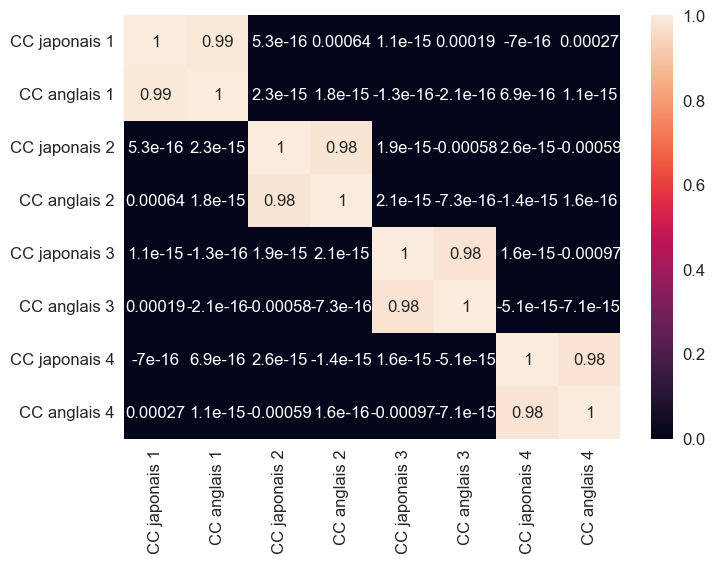

In [19]:
sns.heatmap(corr_X_df, annot=True)

<Axes: >

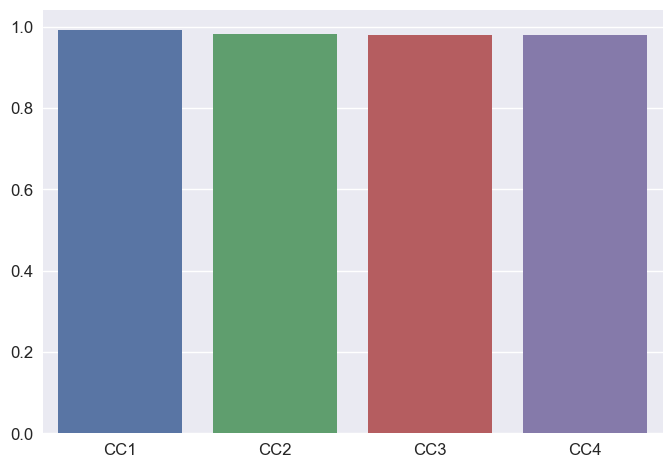

In [14]:
corr= {"CC1":corr_X_df.iloc[1, 0], "CC2":corr_X_df.iloc[2, 3], "CC3":corr_X_df.iloc[5, 4], "CC4":corr_X_df.iloc[6, 7]}
corr = pd.DataFrame(corr, index=[0])
sns.barplot(corr)

In [15]:
corr

,CC1,CC2,CC3,CC4
0,0.991907,0.983108,0.97941,0.978302


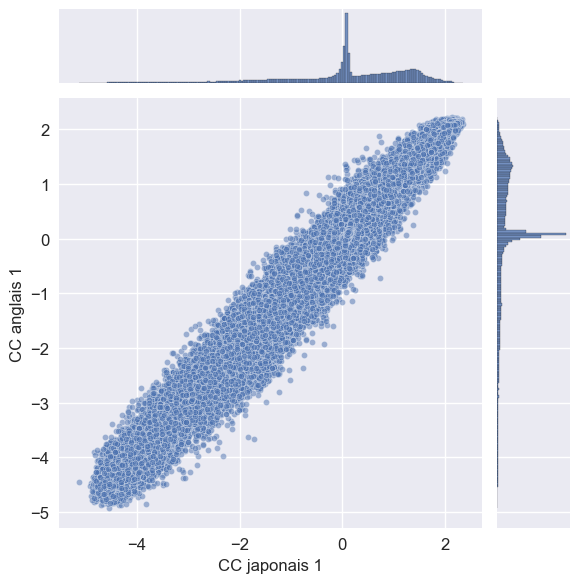

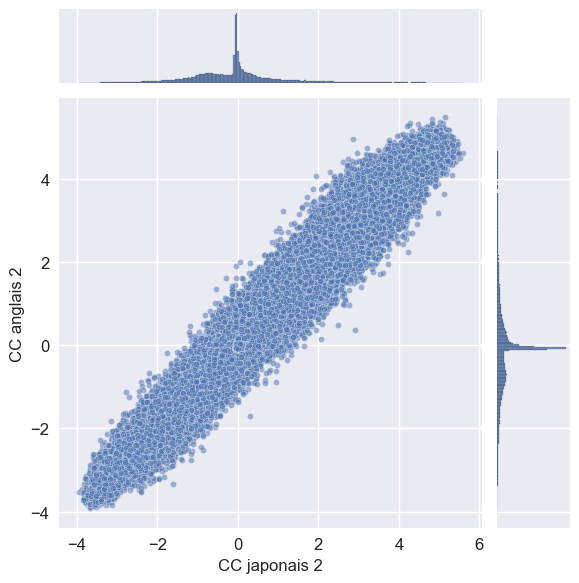

In [16]:
sns.jointplot(cc_res, x='CC japonais 1', y="CC anglais 1", s=20, alpha=0.5)
sns.jointplot(cc_res, x='CC japonais 2', y="CC anglais 2", s=20, alpha=0.5)
#sns.jointplot(cc_res, x='CC japonais 3', y="CC anglais 3", ax=ax3)

# Extraction des résidus de la CCA et PCA dessus

In [20]:
# Calculate the residuals
jp_residuals = data_jp - np.dot(jp_scores, cca.y_loadings_.T)
en_residuals = data_en - np.dot(en_scores, cca.x_loadings_.T)

In [21]:
residuals_pca_jp = PCA(n_components=30)
reduced_jp = residuals_pca_jp.fit_transform(jp_residuals)

In [22]:
residuals_pca_en = PCA(n_components=30)
reduced_en = residuals_pca_en.fit_transform(en_residuals)

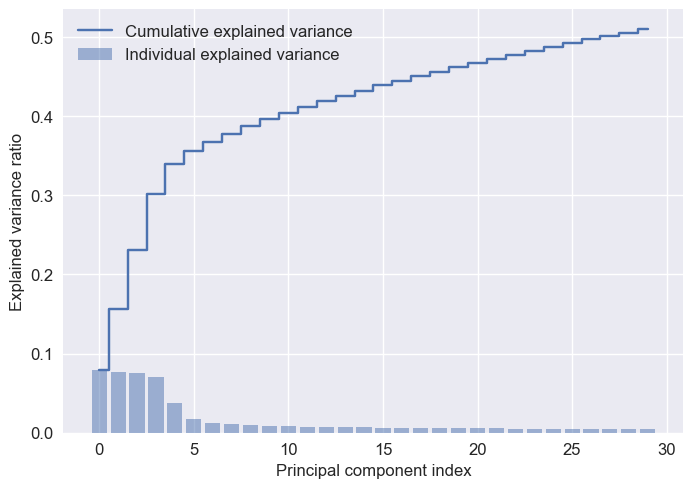

In [23]:
plot_explained_variance(residuals_pca_jp)

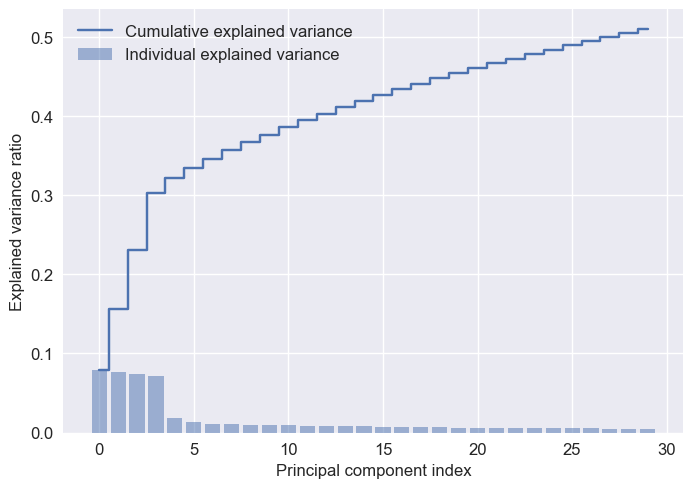

In [24]:
plot_explained_variance(residuals_pca_en)

In [25]:
loadings_jp = pd.DataFrame(residuals_pca_jp.components_.T)
loadings_en = pd.DataFrame(residuals_pca_en.components_.T)

C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3185953921.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_en, x=0, y=1, alpha = 0.2, s=20, palette= 'blue', legend=False, ax=ax1)
C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3185953921.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_en, x=0, y=2, alpha = 0.2, s=20, palette= 'dark', ax=ax2)
C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3185953921.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_en, x=1, y=2,  alpha = 0.2, s=20, palette= 'dark', legend=False, ax=ax3)


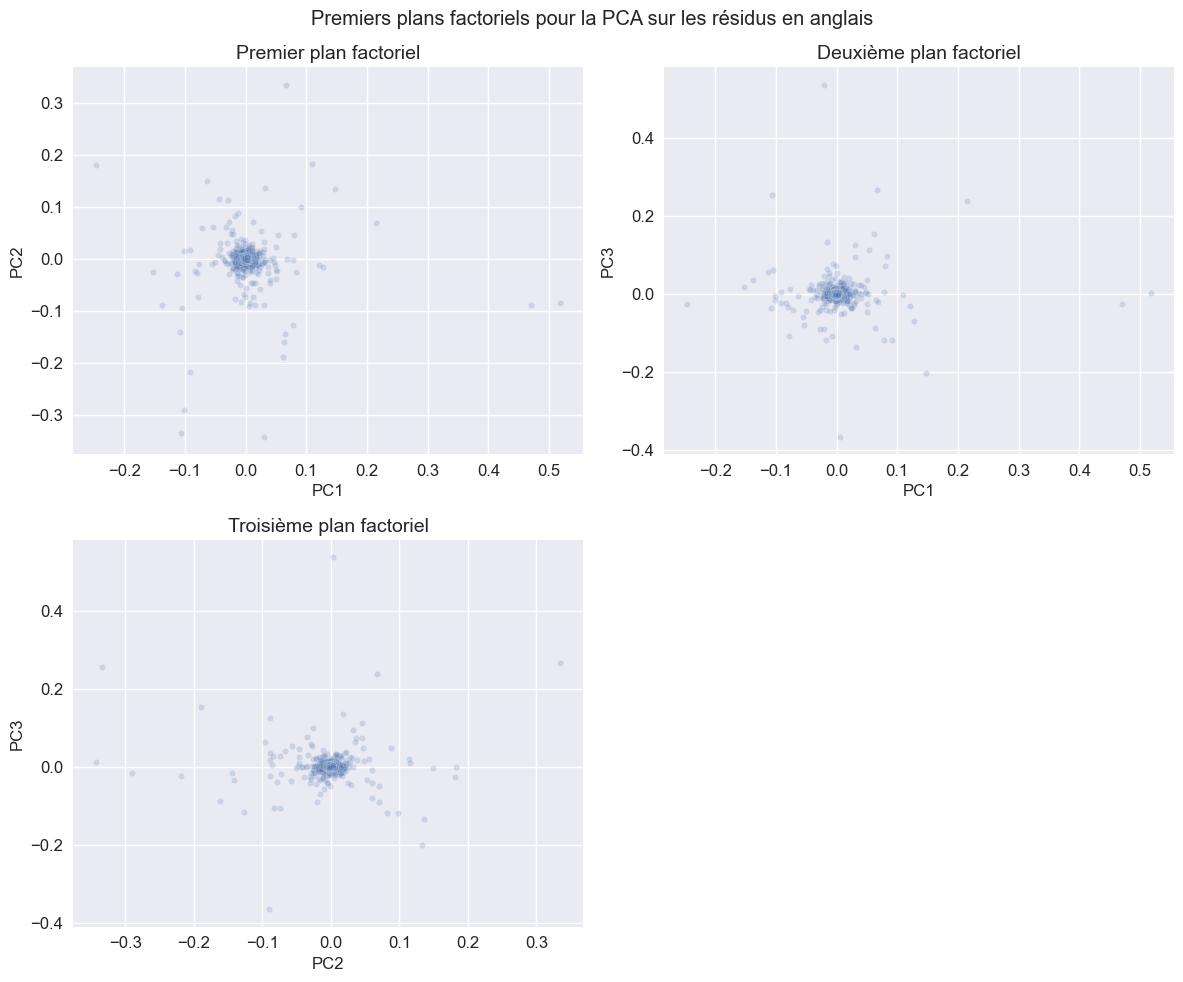

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
#sns.kdeplot(data=loadings_jp, x=0, y=1, palette= 'dark', legend=False, ax=ax1, kind='kde', color='red', alpha = 0.5)
sns.scatterplot(data=loadings_en, x=0, y=1, alpha = 0.2, s=20, palette= 'blue', legend=False, ax=ax1)

sns.scatterplot(data=loadings_en, x=0, y=2, alpha = 0.2, s=20, palette= 'dark', ax=ax2)
sns.scatterplot(data=loadings_en, x=1, y=2,  alpha = 0.2, s=20, palette= 'dark', legend=False, ax=ax3)
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
fig.suptitle('Premiers plans factoriels pour la PCA sur les résidus en anglais')
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()

C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3182668820.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_jp, x=0, y=1, alpha = 0.2, s=20, palette= 'blue', legend=False, ax=ax1)
C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3182668820.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_jp, x=0, y=2, alpha = 0.2, s=20, palette= 'dark', ax=ax2)
C:\Users\Ambre\AppData\Local\Temp\ipykernel_2832\3182668820.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=loadings_jp, x=1, y=2,  alpha = 0.2, s=20, palette= 'dark', legend=False, ax=ax3)


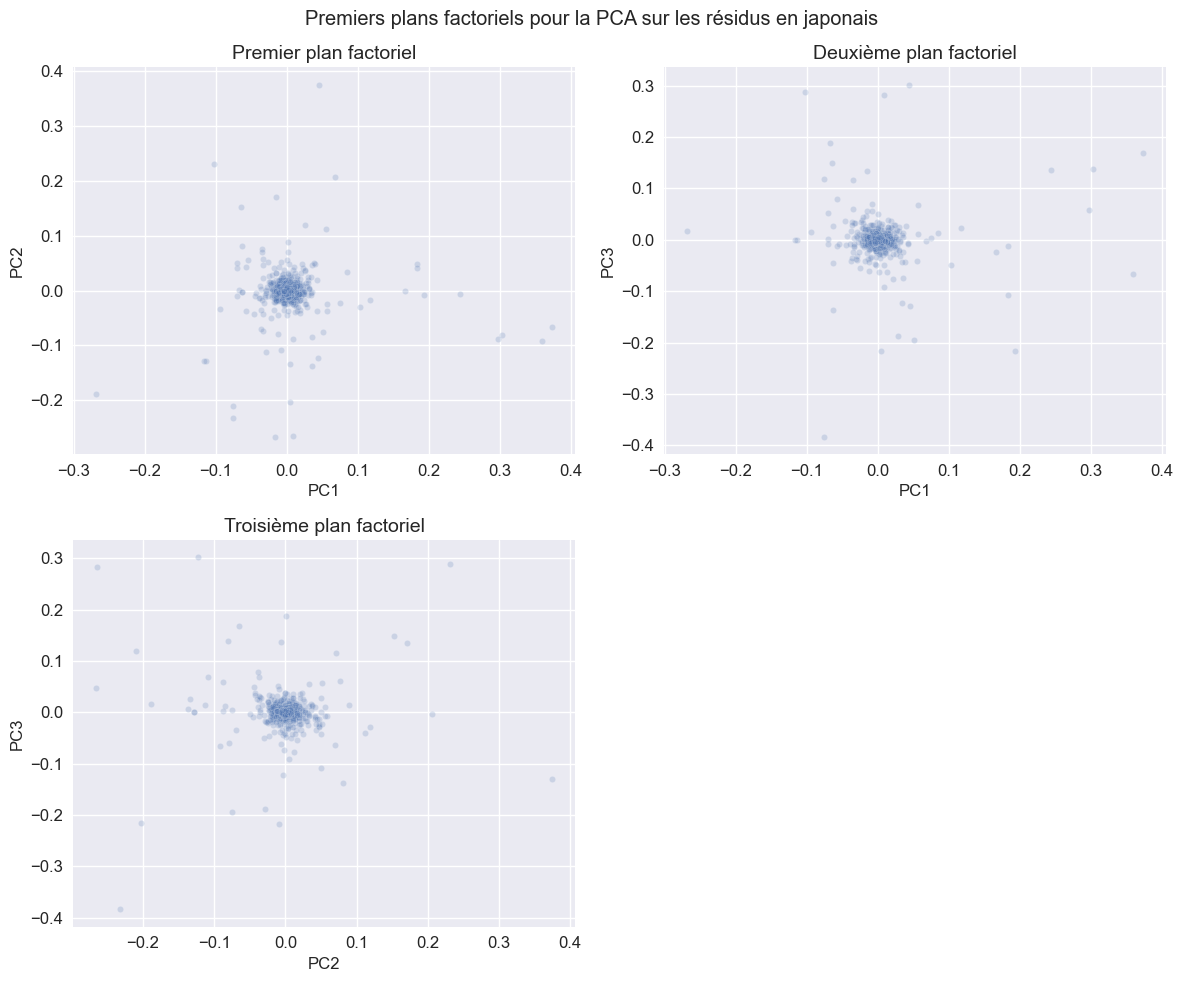

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
#sns.kdeplot(data=loadings_jp, x=0, y=1, palette= 'dark', legend=False, ax=ax1, kind='kde', color='red', alpha = 0.5)
sns.scatterplot(data=loadings_jp, x=0, y=1, alpha = 0.2, s=20, palette= 'blue', legend=False, ax=ax1)

sns.scatterplot(data=loadings_jp, x=0, y=2, alpha = 0.2, s=20, palette= 'dark', ax=ax2)
sns.scatterplot(data=loadings_jp, x=1, y=2,  alpha = 0.2, s=20, palette= 'dark', legend=False, ax=ax3)
ax1.set(title='Premier plan factoriel', xlabel='PC1', ylabel='PC2')
ax2.set(title='Deuxième plan factoriel', xlabel='PC1', ylabel='PC3')
ax3.set(title='Troisième plan factoriel', xlabel='PC2', ylabel='PC3')
ax4.remove()
fig.suptitle('Premiers plans factoriels pour la PCA sur les résidus en japonais')
#plt.legend(title='Langue d\'entraînement', bbox_to_anchor=(1,1))
plt.tight_layout()